<a href="https://colab.research.google.com/github/jiiwon129/Public-Education-Data-Analysis/blob/main/OECD_Well_being.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **OECD 데이터를 이용한 한국 학생들의 낮은 정서적 안정감과 행복도 시각화**

##### 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

##### 데이터 불러오기

In [2]:
wb=pd.read_csv('/content/drive/MyDrive/public education datasets/OECD_current_well_being.csv',sep=',')
wb

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,NZL,New Zealand,11_1,Life satisfaction,0_TO_10,0-10 scale,...,7.800000,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
1,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,NOR,Norway,11_1_DEP,Life satisfaction score less than 5,PT_POP_Y_GE16_SUB,Percentage of population aged 16 years or over...,...,4.606386,NaN,D,Definition differs,0,Units,2,Two,NaN,NaN
2,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,CRI,Costa Rica,11_3,Feelings of physical pain,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,41.308557,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
3,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,NZL,New Zealand,2_3,Long-term unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0.523584,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
4,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,USA,United States,2_3,Long-term unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,0.424382,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,ROU,Romania,2_9,Job satisfaction,0_TO_10,0-10 scale,...,8.010458,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2746,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,HRV,Croatia,7_3_DEP,Satisfaction with personal relationships score...,PT_POP_Y_GE16_SUB,Percentage of population aged 16 years or over...,...,2.615219,NaN,D,Definition differs,0,Units,2,Two,NaN,NaN
2747,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,ROU,Romania,11_1_DEP,Life satisfaction score less than 5,PT_POP_Y_GE16_SUB,Percentage of population aged 16 years or over...,...,3.200484,NaN,A,Normal value,0,Units,2,Two,NaN,NaN
2748,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,BGR,Bulgaria,2_9,Job satisfaction,0_TO_10,0-10 scale,...,6.357281,NaN,D,Definition differs,0,Units,2,Two,NaN,NaN


##### 데이터 결측치 및 변수 확인

In [3]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STRUCTURE           2750 non-null   object 
 1   STRUCTURE_ID        2750 non-null   object 
 2   STRUCTURE_NAME      2750 non-null   object 
 3   ACTION              2750 non-null   object 
 4   REF_AREA            2750 non-null   object 
 5   Reference area      2750 non-null   object 
 6   MEASURE             2750 non-null   object 
 7   Measure             2750 non-null   object 
 8   UNIT_MEASURE        2750 non-null   object 
 9   Unit of measure     2750 non-null   object 
 10  AGE                 2750 non-null   object 
 11  Age                 2750 non-null   object 
 12  SEX                 2750 non-null   object 
 13  Sex                 2750 non-null   object 
 14  EDUCATION_LEV       2750 non-null   object 
 15  Education level     2750 non-null   object 
 16  DOMAIN

dataset에서 **Time period, Observation value, BASE_PER, Base period** 네 변수의 값이 Null 값으로 나타난다.

-> 네 변수를 제거하는 방향으로 전처리 진행

**TIME_PERIOD** 변수가 int형 객체로 나타난다.

-> datatime 객체로 변환하는 전처리 진행

##### 데이터 전처리 진행

앞서 언급한 4개의 변수 drop

In [4]:
wb=wb.drop(['Time period','Observation value','BASE_PER','Base period'],axis=1)

datetime 변수 int형에서 datetime 객체로 변환

In [5]:
wb['TIME_PERIOD']=pd.to_datetime(wb['TIME_PERIOD'],format='%Y')

데이터 전처리 후 확인

In [6]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   STRUCTURE           2750 non-null   object        
 1   STRUCTURE_ID        2750 non-null   object        
 2   STRUCTURE_NAME      2750 non-null   object        
 3   ACTION              2750 non-null   object        
 4   REF_AREA            2750 non-null   object        
 5   Reference area      2750 non-null   object        
 6   MEASURE             2750 non-null   object        
 7   Measure             2750 non-null   object        
 8   UNIT_MEASURE        2750 non-null   object        
 9   Unit of measure     2750 non-null   object        
 10  AGE                 2750 non-null   object        
 11  Age                 2750 non-null   object        
 12  SEX                 2750 non-null   object        
 13  Sex                 2750 non-null   object      

##### 시각화를 위한 추가 전처리

In [7]:
korea_wb = wb[wb["Reference area"] == "Korea"]

korea_wb_sc=korea_wb[(korea_wb['Domain']=='Social connections') &
                     (korea_wb['Age']=='Young')]
korea_wb_sc.sort_values(by='Measure')
korea_wb_sc

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,DOMAIN,Domain,TIME_PERIOD,OBS_VALUE,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
1345,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,KOR,Korea,7_1,Social support,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,HSL_7,Social connections,2023-01-01,94.092952,A,Normal value,0,Units,2,Two
2309,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,KOR,Korea,7_1_DEP,Lack of social support,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,HSL_7,Social connections,2023-01-01,5.907048,A,Normal value,0,Units,2,Two


In [8]:
# 컬럼 확인
print(wb.columns)

# Social connections 도메인 필터링 후 샘플 보기
# 전체 Social connections 데이터
social_wb = wb[wb['Domain'] == 'Social connections']

social_wb = social_wb[social_wb['Age']=='Young']

# 한국 제외한 데이터프레임 생성
social_wb = social_wb[social_wb['Reference area'] != 'Korea']
social_wb.head()

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'AGE', 'Age', 'SEX', 'Sex', 'EDUCATION_LEV',
       'Education level', 'DOMAIN', 'Domain', 'TIME_PERIOD', 'OBS_VALUE',
       'OBS_STATUS', 'Observation status', 'UNIT_MULT', 'Unit multiplier',
       'DECIMALS', 'Decimals'],
      dtype='object')


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,DOMAIN,Domain,TIME_PERIOD,OBS_VALUE,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
12,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,GRC,Greece,7_2,Time spent in social interactions,H_WK,Hours per week,...,HSL_7,Social connections,2012-01-01,6.923826,A,Normal value,0,Units,2,Two
28,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,GRC,Greece,7_1_DEP,Lack of social support,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,HSL_7,Social connections,2023-01-01,4.622213,A,Normal value,0,Units,2,Two
32,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,USA,United States,7_4,Feeling lonely,PT_POP_Y_GE16_SUB,Percentage of population aged 16 years or over...,...,HSL_7,Social connections,2024-01-01,24.377778,D,Definition differs,0,Units,2,Two
51,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,SVK,Slovak Republic,7_1,Social support,PT_POP_Y_GE15_SUB,Percentage of population aged 15 years or over...,...,HSL_7,Social connections,2023-01-01,96.478444,A,Normal value,0,Units,2,Two
53,DATAFLOW,OECD.WISE.WDP:DSD_HSL@DF_HSL_CWB_AGE(1.1),Current well-being by age,I,IRL,Ireland,7_2,Time spent in social interactions,H_WK,Hours per week,...,HSL_7,Social connections,2005-01-01,8.040461,A,Normal value,0,Units,2,Two


##### 데이터 시각화

한국과 한국을 제외한 OECD 국가들을 indicator: Lack of social support, Social support로 진행한 시각화
- 한국을 제외한 OECD 국가들의 Observation value는 평균을 이용

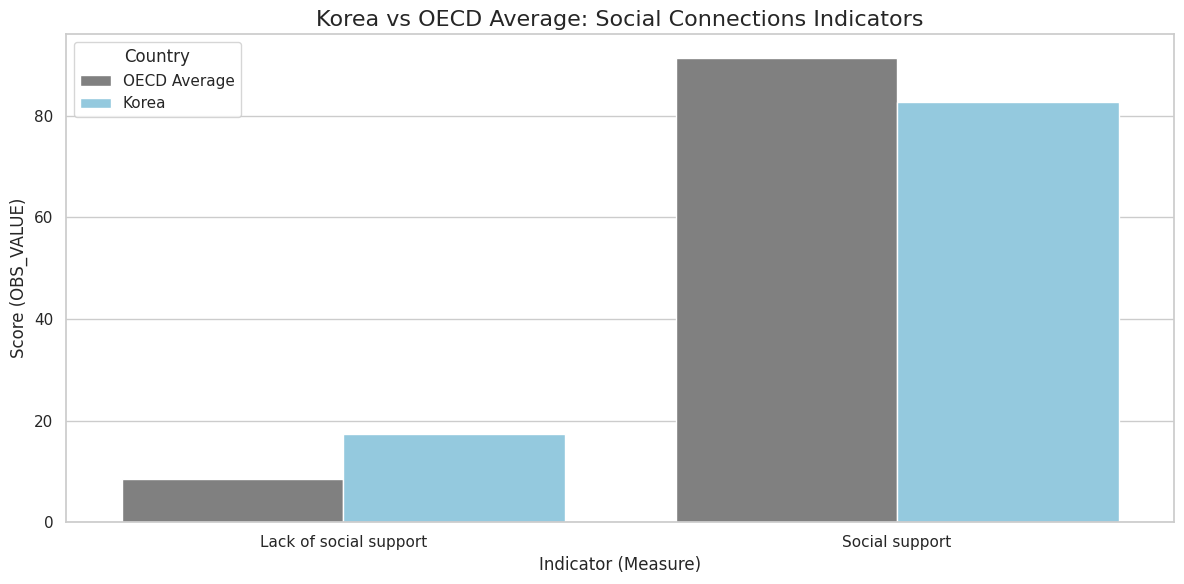

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 불러오기 및 전처리
wb = pd.read_csv("/content/drive/MyDrive/public education datasets/OECD_current_well_being.csv")
wb = wb.drop(['Time period', 'Observation value', 'BASE_PER', 'Base period'], axis=1)
wb['TIME_PERIOD'] = pd.to_datetime(wb['TIME_PERIOD'], format='%Y')

# 한국만 필터링
korea_wb = wb[wb["Reference area"] == "Korea"]
korea_wb_sc = korea_wb[korea_wb['Domain'] == 'Social connections']

# 한국을 제외한 나머지 OECD 국가의 Social connections 중 Measure 평균 계산
social_wb = wb[wb['Domain'] == 'Social connections']
mean_by_measure = social_wb.groupby("Measure")["OBS_VALUE"].mean().reset_index()
mean_by_measure.columns = ['Measure', 'OECD Average']

# 한국 값과 병합
korea_vals = korea_wb_sc.groupby("Measure")["OBS_VALUE"].mean().reset_index()
korea_vals.columns = ['Measure', 'Korea']
merged = pd.merge(mean_by_measure, korea_vals, on='Measure')

# Melt for grouped bar plot
melted = pd.melt(merged, id_vars='Measure', value_vars=['OECD Average', 'Korea'],
                 var_name='Country', value_name='Value')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Measure', y='Value', hue='Country', palette={'Korea': 'skyblue', 'OECD Average': 'gray'})

plt.title('Korea vs OECD Average: Social Connections Indicators', fontsize=16)
plt.xlabel('Indicator (Measure)', fontsize=12)
plt.ylabel('Score (OBS_VALUE)', fontsize=12)
plt.tight_layout()
plt.show()

##### 추가 시각화

한국을 제외한 OECD 국가에서의 Domain이 Social connections인 데이터들의 Measure 값들을 이용하여 시각화 시도

In [30]:
selected_measures = sorted(
    wb[wb['Domain'] == 'Social connections']['Measure'].dropna().unique()
)

print(selected_measures)

['Feeling lonely', 'Lack of social support', 'Satisfaction with personal relationships', 'Satisfaction with personal relationships score less than 5', 'Social support', 'Time spent in social interactions']


In [34]:
social_wb['Reference area'].value_counts()

,count
Reference area,
Greece,18
Luxembourg,18
United Kingdom,18
Ireland,18
Finland,18
Estonia,18
Belgium,18
Hungary,18
Poland,18


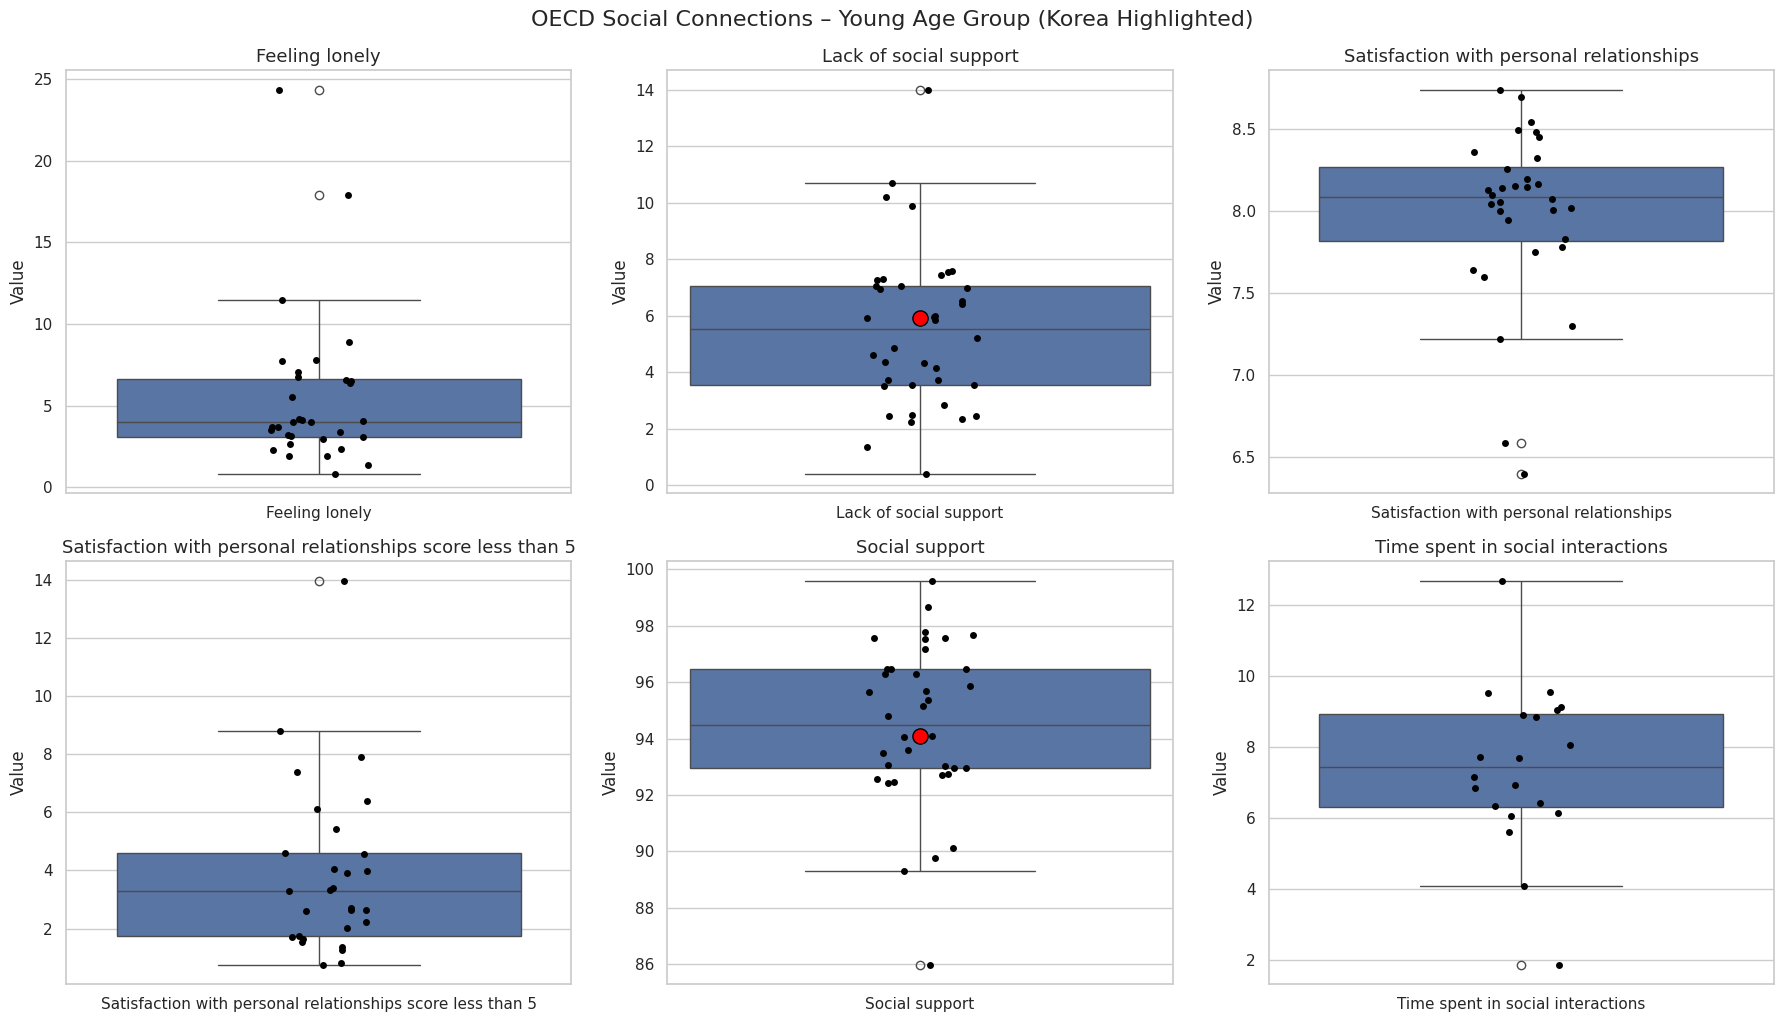

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화할 Measure 리스트
selected_measures = sorted(
    wb[wb['Domain'] == 'Social connections']['Measure'].dropna().unique()
)

# 2x3 subplot 준비
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Measure별 subplot
for idx, measure in enumerate(selected_measures):
    ax = axes[idx]

    # OECD (Korea 제외) 데이터
    oecd_data = social_wb[
        (social_wb['Measure'] == measure) &
        (social_wb['Age'] == 'Young')
    ]

    # Korea 데이터
    korea_data = korea_wb[
        (korea_wb['Measure'] == measure) &
        (korea_wb['Age'] == 'Young')
    ]

    # 박스플롯 + 점그래프
    sns.boxplot(data=oecd_data, x='Measure', y='OBS_VALUE', ax=ax)
    sns.stripplot(data=oecd_data, x='Measure', y='OBS_VALUE', color='black', ax=ax)

    # 한국 점 표시
    if not korea_data.empty:
        x_val = oecd_data[oecd_data['Measure'] == measure]['Measure'].values[0]
        for y_val in korea_data['OBS_VALUE'].values:
            ax.scatter(
                x=[x_val],
                y=[y_val],
                color='red',
                s=120,
                edgecolor='black',
                zorder=10
            )

    ax.set_title(measure, fontsize=13)
    ax.set_xlabel('')
    ax.set_ylabel('Value')

# 빈 subplot 숨기기 (혹시 selected_measures < 6일 경우 대비)
for i in range(len(selected_measures), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("OECD Social Connections – Young Age Group (Korea Highlighted)", fontsize=16, y=1.02)
plt.show()

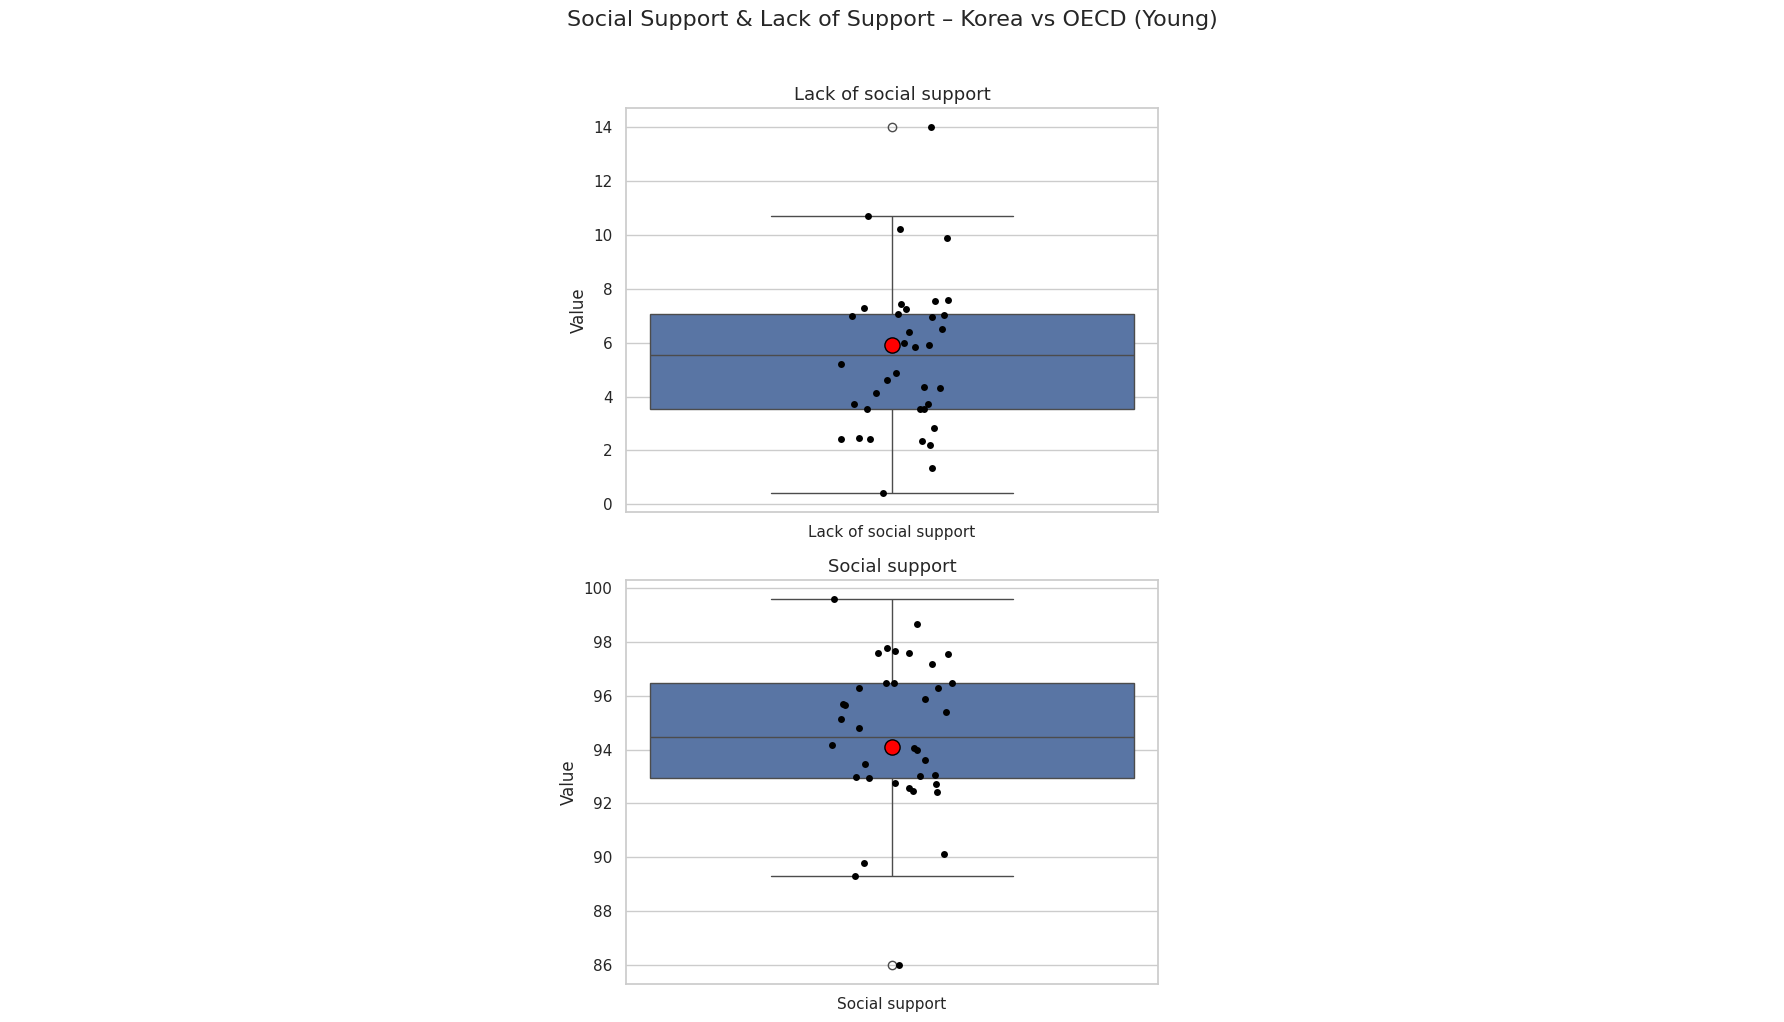

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화할 Measure 2개
selected_measures = ['Lack of social support', 'Social support']
subplot_positions = [(0, 1), (1, 1)]  # 원하는 위치: [0,1], [1,1]

# 2x3 subplot 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 전체 subplot 평탄화
axes_flat = axes.flatten()

# 모든 subplot 비워두고, 우리가 원하는 위치만 사용
for ax in axes_flat:
    ax.axis('off')  # 먼저 다 꺼줌

# 원하는 Measure 2개 그리기
for measure, pos in zip(selected_measures, subplot_positions):
    ax = axes[pos]  # 지정된 위치의 subplot 사용

    # OECD 데이터 (Korea 제외)
    oecd_data = social_wb[
        (social_wb['Measure'] == measure) &
        (social_wb['Age'] == 'Young')
    ]

    # 한국 데이터
    korea_data = korea_wb[
        (korea_wb['Measure'] == measure) &
        (korea_wb['Age'] == 'Young')
    ]

    # 다시 on으로 전환
    ax.axis('on')

    # 그래프 그리기
    sns.boxplot(data=oecd_data, x='Measure', y='OBS_VALUE', ax=ax)
    sns.stripplot(data=oecd_data, x='Measure', y='OBS_VALUE', color='black', ax=ax)

    # 한국 점 추가
    if not korea_data.empty:
        x_val = oecd_data[oecd_data['Measure'] == measure]['Measure'].values[0]
        for y_val in korea_data['OBS_VALUE'].values:
            ax.scatter(
                x=[x_val],
                y=[y_val],
                color='red',
                s=120,
                edgecolor='black',
                zorder=10
            )

    ax.set_title(measure, fontsize=13)
    ax.set_xlabel('')
    ax.set_ylabel('Value')

# 전체 제목
plt.suptitle("Social Support & Lack of Support – Korea vs OECD (Young)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()